<a href="https://colab.research.google.com/github/manishramamoorthy/Final-Project-GUVI/blob/main/Final_Project_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content of Breast Cancer Prediction :**           
1) Importing Libraries              
2) Load a DataSet             
3) Data PreProcessing             

    ->1) Top Five Rows of DataSet    
    ->2) Last Five Rows of DataSet               
    ->3) Shape of a DataSet                          
    ->4) Data Types                          
    ->5) Information of DataSet                 
    ->6) Checking Missing Values of DataSet              
    ->7) Droping Duplicates Values of Dataset

4) EDA (Exploratory Data Analysis)

    ->1)Statistical Measures     
    ->2) Analysis a Target Count    
    ->3) Visualization of Target Count Plot    
    ->4) Visualization Pair Plot of Some Features  
    ->5) Visualization of Correlation    

5) Train and Test Split            
6) Feature Scaling             
7) Build a Model            

    ->1) Support Vector Machine     
    ->2) Decision Tree Classifier     
    ->3) Random Forest Classifier 

8) Making Prediction                   
9) Compare Actual and Predicted Scores             
10) Evaluation Metrics                
11) Feature Importances               

**Summary of Breast Cancer Prediction:** 


Breast Cancer Prediction is a **Supervised Learning**. The Vision of Breast Cancer Prediction is a From Analysis a Feature to Predict **a Patient Cancer (or) Not-Cancer**

# **1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
from sklearn.metrics import classification_report

# **2) Load a DataSet**

In [2]:
breast_cancer_data = pd.read_csv("/content/Cancer_Dataset.csv")

# **3) Data PreProcessing**

**1) Top Five Rows of DataSet**

In [3]:
breast_cancer_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**2) Last Five Rows of DataSet**

In [4]:
breast_cancer_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**3) Shape of a DataSet**

In [5]:
breast_cancer_data.shape
print("Number of Rows: ",breast_cancer_data.shape[0])
print("Number of Columns: ",breast_cancer_data.shape[1])

Number of Rows:  303
Number of Columns:  14


**4) Data Types**

In [6]:
breast_cancer_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**5) Information of DataSet**

In [7]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**6) Checking Missing Values of DataSet**

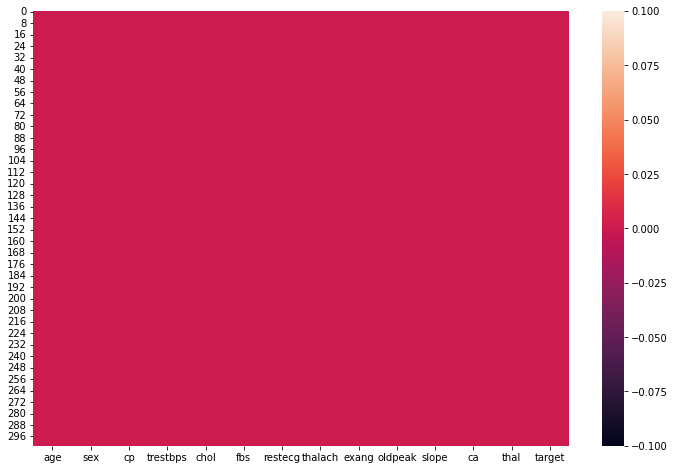

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(breast_cancer_data.isnull())

In [10]:
breast_cancer_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**7) Droping Duplicates Values of Dataset**

In [11]:
breast_cancer_data =  breast_cancer_data.drop_duplicates()

# **4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [13]:
breast_cancer_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**2) Analysis a Target Count**

In [14]:
breast_cancer_data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

**3) Visualization of Target Count Plot**

Text(0.5, 1.0, 'Counts of Target')

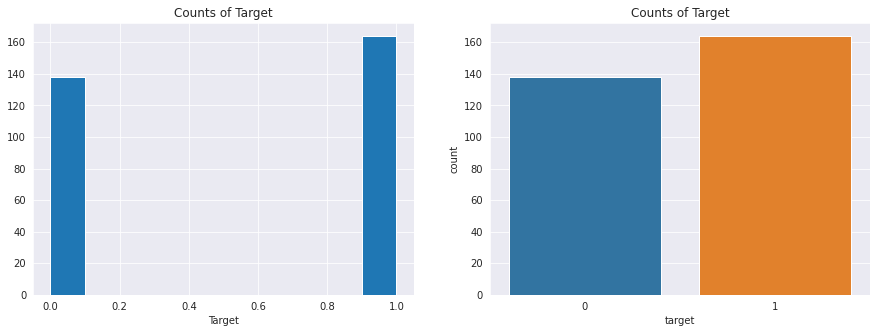

In [15]:
plt.figure(figsize=(15, 5))

sns.set_style('darkgrid')

plt.subplot(1, 2, 1)
plt.hist(breast_cancer_data.target)

plt.title("Counts of Target")
plt.xlabel("Target")


plt.subplot(1, 2, 2)

sns.countplot('target', data=breast_cancer_data)
plt.title("Counts of Target")

In [17]:
import plotly.express as px
plt.figure(figsize=(8,8))
px.histogram(breast_cancer_data, x='target')

<Figure size 576x576 with 0 Axes>

**4) Visualization Pair Plot of Some Features**

In [18]:
breast_cancer_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

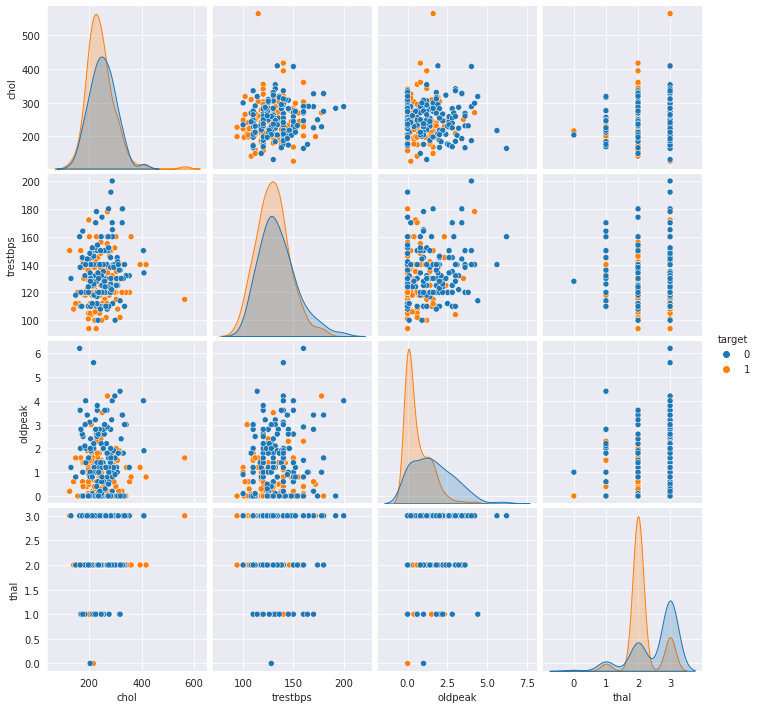

In [19]:
cols = ["target", "chol", "trestbps", "oldpeak","thal"]

sns.pairplot(breast_cancer_data[cols], hue="target")
plt.show()

**5) Visualization of Correlation**

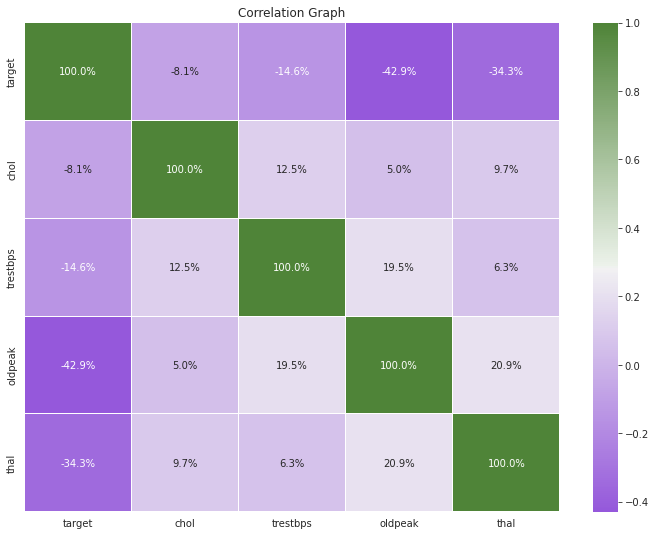

In [20]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(breast_cancer_data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)

# **5) Train and Test Split**

In [21]:
breast_cancer_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
X = breast_cancer_data.drop(columns=["age","sex","target"],axis=1)
y = breast_cancer_data["target"]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

# **6) Feature Scaling**

**Feature Scaling** is a Techique to Standardize the Independent Features Present in the data in a Fixed Range.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-9.61565464e-01, -1.28091101e+00, -1.69672381e-01,
        -4.42455869e-01,  8.95287276e-01, -1.07679746e+00,
         1.46249406e+00,  1.56449014e+00, -5.86825280e-01,
         2.98555910e-01,  1.14285714e+00],
       [-9.61565464e-01, -9.87314773e-01,  2.31956107e-01,
        -4.42455869e-01, -9.78184246e-01,  1.57277208e+00,
        -6.83763459e-01, -8.86634796e-01,  1.01103633e+00,
        -6.93703437e-01, -4.71428571e-01],
       [-9.61565464e-01, -1.28091101e+00, -8.00802862e-01,
        -4.42455869e-01, -9.78184246e-01, -1.88514071e+00,
         1.46249406e+00, -8.86634796e-01, -5.86825280e-01,
         2.98555910e-01, -4.71428571e-01],
       [ 9.36371609e-01, -1.86810348e+00, -4.94800204e-01,
        -4.42455869e-01,  8.95287276e-01, -3.13362170e-01,
         1.46249406e+00,  1.63847321e-01, -5.86825280e-01,
        -6.93703437e-01, -4.71428571e-01],
       [-1.25969275e-02, -1.06526068e-01,  2.70206440e-01,
        -4.42455869e-01,  8.95287276e-01,  2.25533331e-01,
  

# **7) Build a Model**

**1) Support Vector Machine**

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

**2) Decision Tree Classifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
from sklearn.model_selection import cross_val_score

for depth in range(1,16):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, tree.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8761061946902655  Cross val score :  0.6952569169960474
Depth  :  2  Training Accuracy :  0.8761061946902655  Cross val score :  0.6723320158102768
Depth  :  3  Training Accuracy :  0.8761061946902655  Cross val score :  0.7606719367588933
Depth  :  4  Training Accuracy :  0.8761061946902655  Cross val score :  0.7693675889328063
Depth  :  5  Training Accuracy :  0.8761061946902655  Cross val score :  0.7470355731225297
Depth  :  6  Training Accuracy :  0.8761061946902655  Cross val score :  0.7116600790513835
Depth  :  7  Training Accuracy :  0.8761061946902655  Cross val score :  0.7383399209486166
Depth  :  8  Training Accuracy :  0.8761061946902655  Cross val score :  0.7073122529644269
Depth  :  9  Training Accuracy :  0.8761061946902655  Cross val score :  0.7203557312252966
Depth  :  10  Training Accuracy :  0.8761061946902655  Cross val score :  0.7027667984189724
Depth  :  11  Training Accuracy :  0.8761061946902655  Cross val score :  0.720

**3) Random Forest Classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth=2,max_features="sqrt")
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [32]:
from sklearn.model_selection import cross_val_score

for depth in range(1,16):
  RF = RandomForestClassifier(max_depth=depth)
  RF.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, RF.predict(X_train)) 
  RF = RandomForestClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8362831858407079  Cross val score :  0.725098814229249
Depth  :  2  Training Accuracy :  0.8451327433628318  Cross val score :  0.724901185770751
Depth  :  3  Training Accuracy :  0.8805309734513275  Cross val score :  0.7207509881422925
Depth  :  4  Training Accuracy :  0.9203539823008849  Cross val score :  0.716403162055336
Depth  :  5  Training Accuracy :  0.9513274336283186  Cross val score :  0.7164031620553359
Depth  :  6  Training Accuracy :  0.9778761061946902  Cross val score :  0.7069169960474309
Depth  :  7  Training Accuracy :  0.9911504424778761  Cross val score :  0.7071146245059288
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.7250988142292492
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.7203557312252965
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.7207509881422925
Depth  :  11  Training Accuracy :  0.995575221238938  Cross val score :  0.7160079051383399
Depth  :  12  Training Accuracy :  

## **8) Making Prediction**

**1) Support Vector Machine**

In [33]:
svm.predict([[3,145,233,1,0,150,0,2.3,0,0,1]])

array([1])

**2) Decision Tree Classifier**

In [34]:
tree.predict([[3,145,233,1,0,150,0,2.3,0,0,1]])

array([1])

**3) Random Forest Classifier**

In [37]:
RF.predict([[3,145,233,1,0,150,0,2.3,0,0,1]])

array([1])

# **9) Compare Actual and Predicted Scores**

**1) Support Vector Machine**

In [38]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [39]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_svm})
df

,Actual,Prediction
224,0,0
57,1,1
264,0,0
66,1,1
114,1,1
...,...,...
268,0,0
111,1,1
174,0,0
84,1,1


**2) Decision Tree Classifier**

In [40]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [41]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_tree})
df

,Actual,Prediction
224,0,0
57,1,1
264,0,0
66,1,1
114,1,1
...,...,...
268,0,0
111,1,1
174,0,0
84,1,1


**3) Random Forest Classifier**

In [42]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [43]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_RF})
df

,Actual,Prediction
224,0,0
57,1,1
264,0,0
66,1,1
114,1,1
...,...,...
268,0,0
111,1,1
174,0,0
84,1,1


# **10) Evaluation Metrics**

In [44]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

**1) Support Vector Machine**

In [45]:
# Accuracy Score
Accuracy_Score = svm.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.8552631578947368


In [46]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_svm)

array([[30,  9],
       [ 2, 35]])

In [47]:
# f1 score
F1_Score = f1_score(y_test,y_pred_svm)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8641975308641975


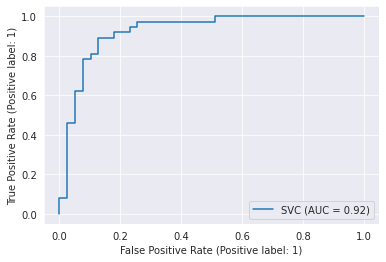

In [48]:
# AUROC Score
plot_roc_curve(svm,X_test,y_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        39
           1       0.80      0.95      0.86        37

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.85        76
weighted avg       0.87      0.86      0.85        76



**2) Decision Tree Classifier**

In [50]:
# Accuracy Score
Accuracy_Score = tree.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.8026315789473685


In [51]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_tree)

array([[29, 10],
       [ 5, 32]])

In [52]:
# f1 score
F1_Score = f1_score(y_test,y_pred_tree)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.810126582278481


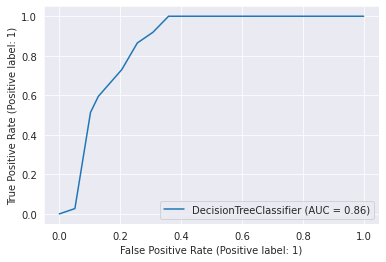

In [53]:
# AUROC Score
plot_roc_curve(tree,X_test,y_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        39
           1       0.76      0.86      0.81        37

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



**3) Random Forest Classifier**

In [55]:
# Accuracy Score
Accuracy_Score = RF.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.8157894736842105


In [56]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_RF)

array([[27, 12],
       [ 2, 35]])

In [57]:
# f1 score
F1_Score = f1_score(y_test,y_pred_RF)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8333333333333334


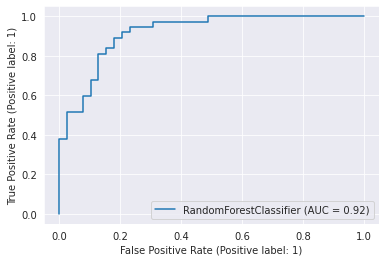

In [58]:
# AUROC Score
plot_roc_curve(RF,X_test,y_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79        39
           1       0.74      0.95      0.83        37

    accuracy                           0.82        76
   macro avg       0.84      0.82      0.81        76
weighted avg       0.84      0.82      0.81        76



# **11) Feature Importances**

**1) Decision Tree Classifier**

In [60]:
# Get numerical feature importances
importances = list(tree.feature_importances_)
# list of tuple with variable and importances
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(X,importances)]
# Sort the feature and importances
feature_importances = sorted(feature_importances, key= lambda X:X[1],reverse = True)
# Print out the Feature of importances
[print("variable: {:20} Importance :{}".format(*pair)) for pair in feature_importances]

variable: cp                   Importance :0.4
variable: oldpeak              Importance :0.18
variable: ca                   Importance :0.15
variable: thal                 Importance :0.13
variable: trestbps             Importance :0.04
variable: thalach              Importance :0.04
variable: slope                Importance :0.03
variable: chol                 Importance :0.02
variable: fbs                  Importance :0.0
variable: restecg              Importance :0.0
variable: exang                Importance :0.0


[None, None, None, None, None, None, None, None, None, None, None]

**2) Random Forest Classifier**

In [61]:
# Get numerical feature importances
importances = list(RF.feature_importances_)
# list of tuple with variable and importances
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(X,importances)]
# Sort the feature and importances
feature_importances = sorted(feature_importances, key= lambda X:X[1],reverse = True)
# Print out the Feature of importances
[print("variable: {:20} Importance :{}".format(*pair)) for pair in feature_importances]

variable: cp                   Importance :0.23
variable: oldpeak              Importance :0.17
variable: ca                   Importance :0.16
variable: thal                 Importance :0.14
variable: thalach              Importance :0.1
variable: exang                Importance :0.09
variable: slope                Importance :0.07
variable: chol                 Importance :0.03
variable: trestbps             Importance :0.01
variable: fbs                  Importance :0.0
variable: restecg              Importance :0.0


[None, None, None, None, None, None, None, None, None, None, None]